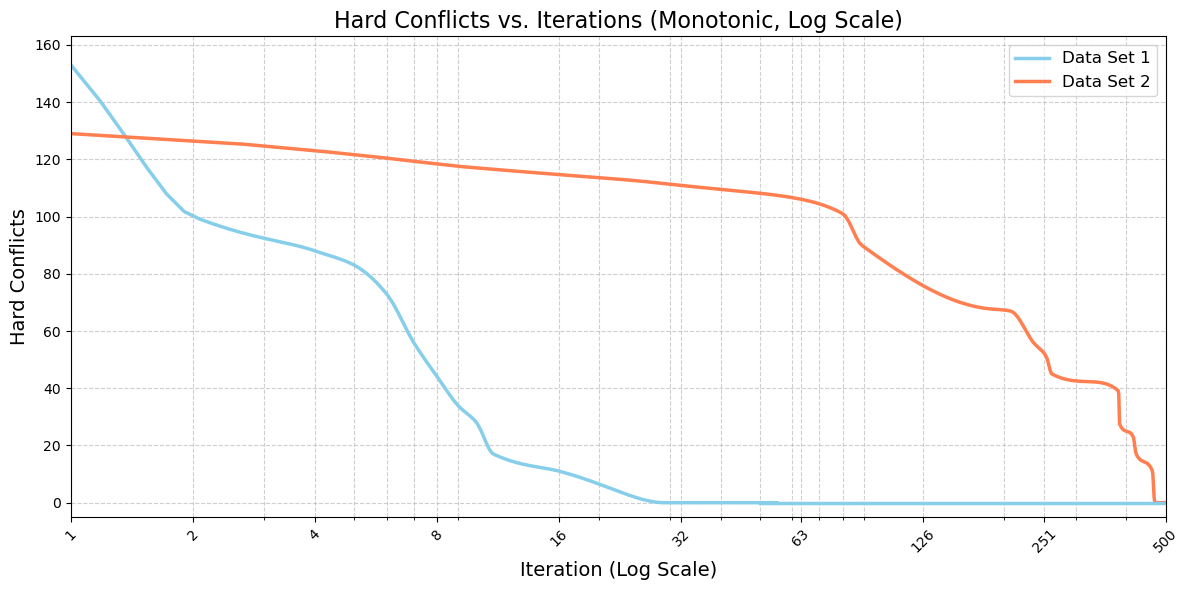

<text x='50' y='50' fill='red'>Error: Invalid input data.</text>


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Data Set 1 
iterations1 = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 16, 29, 31, 33, 37, 45, 55]
hard_conflicts1 = [153, 100, 88, 83, 73, 56, 44, 34, 28, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 2
iterations2 = [1, 4, 10, 27, 80, 89, 178, 207, 236, 254, 262, 383, 384, 416, 423, 464, 470, 480, 485, 490, 500]
hard_conflicts2 = [129, 123, 117, 112, 101, 90, 68, 67, 56, 51, 45, 39, 28, 23, 17, 11, 0, 0, 0, 0, 0, 0]

def process_and_plot(iterations, hard_conflicts, color, label, ax):
    """Processes and plots a single dataset."""
    sorted_data = sorted(zip(iterations, hard_conflicts))
    iterations, hard_conflicts = zip(*sorted_data)

    pchip = PchipInterpolator(iterations, hard_conflicts)
    xnew = np.linspace(min(iterations), max(iterations), 300)
    y_smooth = pchip(xnew)

    for i in range(1, len(y_smooth)):
        y_smooth[i] = max(0, min(y_smooth[i - 1], y_smooth[i]))

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)

def integer_log_ticks(min_val, max_val, num_ticks=10):
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= min_val) & (int_ticks <= max_val)]
    return int_ticks

fig, ax = plt.subplots(figsize=(12, 6))

# --- Determine Overall Maximum Iteration ---
max_iteration = max(max(iterations1), max(iterations2))

# Plot datasets
process_and_plot(iterations1, hard_conflicts1, 'skyblue', 'Data Set 1', ax)
process_and_plot(iterations2, hard_conflicts2, 'coral', 'Data Set 2', ax)

# --- Horizontal Line at Zero (Starting from 50) ---
ax.plot([50, max_iteration], [0, 0], color='skyblue', linewidth=2.5)  # Removed linestyle


# --- Logarithmic X-Axis, Integer Ticks, and X-Axis Limit ---
ax.set_xscale('log')
tick_positions = integer_log_ticks(1, max_iteration)
ax.set_xticks(tick_positions)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)

# --- General Plot Styling ---
ax.set_title('Hard Conflicts vs. Iterations (Monotonic, Log Scale)', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Hard Conflicts', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)
ax.set_ylim(-5, max(max(hard_conflicts1), max(hard_conflicts2)) + 10)
ax.legend(fontsize=12)
plt.tight_layout()
plt.savefig('hard_conflicts_combined_log_int_ticks_xlim_zero_line_solid.svg', format='svg') # save
plt.show()



def generate_combined_svg(iterations1, hard_conflicts1, iterations2, hard_conflicts2, width=800, height=400, padding=50):
    """SVG with horizontal line at zero (solid)."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, hard_conflicts):
            if not iterations or not hard_conflicts or len(iterations) != len(hard_conflicts) or len(iterations) < 2:
                return None, None
            sorted_data = sorted(zip(iterations, hard_conflicts))
            iterations, hard_conflicts = zip(*sorted_data)

            pchip = PchipInterpolator(iterations, hard_conflicts)
            xnew = np.linspace(min(iterations), max(iterations), 300)
            y_smooth = pchip(xnew)
            for i in range(1, len(y_smooth)):
                y_smooth[i] = max(0, min(y_smooth[i - 1], y_smooth[i]))
            return xnew, y_smooth
        
        max_iteration = max(max(iterations1), max(iterations2))

        xnew1, y_smooth1 = process_data(iterations1, hard_conflicts1)
        xnew2, y_smooth2 = process_data(iterations2, hard_conflicts2)

        if xnew1 is None or xnew2 is None:
           return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"
        max_conflict = max(max(hard_conflicts1),max(hard_conflicts2))

        svg_elements = []
        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Hard Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Hard Conflicts</text>")
        def log_scale(x):
            return np.log(max(x, 1e-10))

        min_log_x = log_scale(1)
        max_log_x = log_scale(max_iteration)
        
        def get_x_coord(iteration):
          log_x = log_scale(iteration)
          x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
          return padding + (log_x - min_log_x) * x_scale
            
        y_scale = (height - 2 * padding) / max_conflict if max_conflict != 0 else 0

        # Plot dataset 1
        path_d1 = "M "
        for i in range(len(xnew1)):
          if xnew1[i] >= 1:
            x_coord = get_x_coord(xnew1[i])
            y_coord = height - padding - y_smooth1[i] * y_scale
            path_d1 += f"{x_coord} {y_coord} "
            if i < len(xnew1) - 1:
              path_d1 += "L "
        svg_elements.append(f"<path d='{path_d1}' stroke='skyblue' stroke-width='2' fill='none'/>")
        
        # Plot dataset 2
        path_d2 = "M "
        for i in range(len(xnew2)):
            if xnew2[i] >= 1:
              x_coord = get_x_coord(xnew2[i])
              y_coord = height - padding - y_smooth2[i] * y_scale
              path_d2 += f"{x_coord} {y_coord} "
              if i < len(xnew2) - 1:
                path_d2 += "L "
        svg_elements.append(f"<path d='{path_d2}' stroke='coral' stroke-width='2' fill='none'/>")

        # --- Horizontal Line at Zero (Starting from 50) in SVG ---
        x1_zero = get_x_coord(50)
        x2_zero = get_x_coord(max_iteration)
        y_zero = height - padding  # y-coordinate for 0 hard conflicts
        svg_elements.append(f"<line x1='{x1_zero}' y1='{y_zero}' x2='{x2_zero}' y2='{y_zero}' stroke='skyblue' stroke-width='2'/>")  # Removed stroke-dasharray

        # Axes
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")

        # Logarithmic X-axis Ticks (Integer, starting from 1)
        tick_positions = integer_log_ticks(1, max_iteration)
        for tick in tick_positions:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y + 20})'>{tick}</text>")

        # Linear Y-axis Ticks
        num_y_ticks = 5
        if y_scale != 0:
          y_tick_interval_val = max_conflict / num_y_ticks
          y_tick_interval_coord = (height - 2 * padding) / num_y_ticks
          for i in range(num_y_ticks + 1):
                x = padding
                y = height - padding - i * y_tick_interval_coord
                svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")
                label = round(i * y_tick_interval_val)
                svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{label}</text>")

        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
        return f"<text x='50' y='50' fill='red'>Error: {e}</text>"

svg_output = generate_combined_svg(iterations1, hard_conflicts1, iterations2, hard_conflicts2)
print(svg_output)

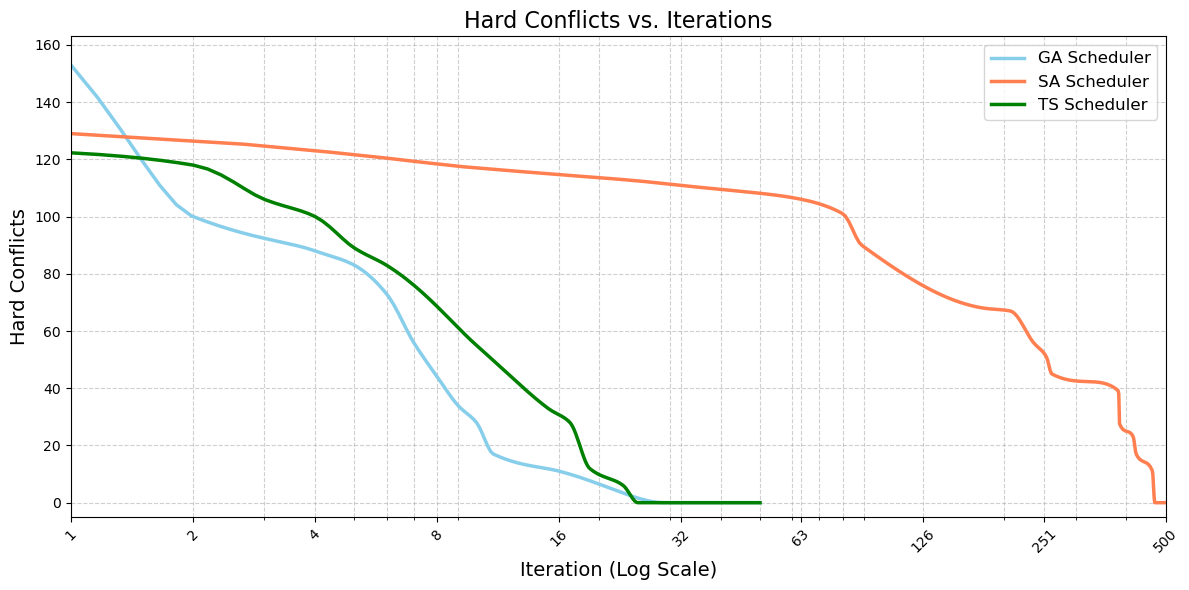

<text x='50' y='50' fill='red'>Error: Invalid input data.</text>


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Data Set 1 GA hard
iterations1 = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 16, 29, 31, 33, 37, 45, 50]
hard_conflicts1 = [153, 100, 88, 83, 73, 56, 44, 34, 28, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 2 SA hard
iterations2 = [1, 4, 10, 27, 80, 89, 178, 207, 236, 254, 262, 383, 384, 416, 423, 464, 470, 480, 485, 490, 500]
hard_conflicts2 = [129, 123, 117, 112, 101, 90, 68, 67, 56, 51, 45, 39, 28, 23, 17, 11, 0, 0, 0, 0, 0, 0]

# Data Set 3 TS hard
iterations3 = [0, 2, 3, 4, 5, 6, 10, 15, 17, 19, 23, 25, 33, 37, 50]
hard_conflicts3 = [124, 118, 106, 100, 89, 83, 55, 33, 28, 12, 6, 0, 0, 0, 0]

def process_and_plot(iterations, hard_conflicts, color, label, ax):
    """Processes and plots a single dataset."""
    sorted_data = sorted(zip(iterations, hard_conflicts))
    iterations, hard_conflicts = zip(*sorted_data)

    pchip = PchipInterpolator(iterations, hard_conflicts)
    xnew = np.linspace(min(iterations), max(iterations), 300)
    y_smooth = pchip(xnew)

    for i in range(1, len(y_smooth)):
        y_smooth[i] = max(0, min(y_smooth[i - 1], y_smooth[i]))

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)

def integer_log_ticks(min_val, max_val, num_ticks=10):
    log_min = np.log10(max(min_val, 1))  # Ensure min_val is at least 1
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= max(1,min_val)) & (int_ticks <= max_val)] # >= 1
    return int_ticks

fig, ax = plt.subplots(figsize=(12, 6))

# --- Determine Overall Maximum Iteration ---
max_iteration = max(max(iterations1), max(iterations2), max(iterations3))

# Plot datasets
process_and_plot(iterations1, hard_conflicts1, 'skyblue', 'GA Scheduler', ax)
process_and_plot(iterations2, hard_conflicts2, 'coral', 'SA Scheduler', ax)
process_and_plot(iterations3, hard_conflicts3, 'green', 'TS Scheduler', ax) # Plot dataset 3

# --- Horizontal Line at Zero --- 
# ax.plot([50, max_iteration], [0, 0], color='skyblue', linewidth=2.5)

# --- Logarithmic X-Axis, Integer Ticks, and X-Axis Limit ---
ax.set_xscale('log')
tick_positions = integer_log_ticks(1, max_iteration)  # Use 1 as min_val
ax.set_xticks(tick_positions)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)  # Keep x-axis limit

# --- General Plot Styling ---
ax.set_title('Hard Conflicts vs. Iterations', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Hard Conflicts', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)
ax.set_ylim(-5, max(max(hard_conflicts1), max(hard_conflicts2), max(hard_conflicts3)) + 10) # Consider all conflicts
ax.legend(fontsize=12)
plt.tight_layout()
plt.savefig('hard_conflicts_combined_log_int_ticks_xlim_zero_line_3datasets.svg', format='svg') # Save the figure
plt.show()



def generate_combined_svg(iterations1, hard_conflicts1, iterations2, hard_conflicts2, iterations3, hard_conflicts3, width=800, height=400, padding=50):
    """SVG with 3 datasets, horizontal line, log x-axis, integer ticks, xlim."""
    try:
        import numpy as np
        from scipy.interpolate import PchipInterpolator

        def process_data(iterations, hard_conflicts):
          if not iterations or not hard_conflicts or len(iterations) != len(hard_conflicts) or len(iterations) < 2:
              return None, None
          sorted_data = sorted(zip(iterations, hard_conflicts))
          iterations, hard_conflicts = zip(*sorted_data)
          
          pchip = PchipInterpolator(iterations, hard_conflicts)
          xnew = np.linspace(min(iterations), max(iterations), 300)
          y_smooth = pchip(xnew)
          
          for i in range(1, len(y_smooth)):
              y_smooth[i] = max(0, min(y_smooth[i - 1], y_smooth[i]))  # Enforce monotonicity and >= 0
          return xnew, y_smooth
            
        max_iteration = max(max(iterations1), max(iterations2), max(iterations3))
        xnew1, y_smooth1 = process_data(iterations1, hard_conflicts1)
        xnew2, y_smooth2 = process_data(iterations2, hard_conflicts2)
        xnew3, y_smooth3 = process_data(iterations3, hard_conflicts3) #Process data set 3

        if xnew1 is None or xnew2 is None or xnew3 is None: #Check dataset 3
          return "<text x='50' y='50' fill='red'>Error: Invalid input data.</text>"

        max_conflict = max(max(hard_conflicts1),max(hard_conflicts2), max(hard_conflicts3)) # Max of all 3

        svg_elements = []
        svg_elements.append(f"<text x='{width/2}' y='{padding/2}' text-anchor='middle' font-size='18'>Hard Conflicts vs. Iterations (Monotonic, Log Scale)</text>")
        svg_elements.append(f"<text x='{width/2}' y='{height - padding/4}' text-anchor='middle' font-size='14'>Iteration (Log Scale)</text>")
        svg_elements.append(f"<text x='{padding/4}' y='{height/2}' text-anchor='middle' font-size='14' transform='rotate(-90 {padding/4} {height/2})'>Hard Conflicts</text>")

        def log_scale(x):
            return np.log(max(x, 1e-10))

        min_log_x = log_scale(1)  # Start log scale at 1
        max_log_x = log_scale(max_iteration)
        
        def get_x_coord(iteration):
            log_x = log_scale(iteration)
            x_scale = (width - 2 * padding) / (max_log_x - min_log_x)
            return padding + (log_x - min_log_x) * x_scale

        y_scale = (height - 2 * padding) / max_conflict if max_conflict != 0 else 0


        # --- Plot dataset 1 (filtering x-values) ---
        path_d1 = "M "
        for i in range(len(xnew1)):
          if xnew1[i] >= 1:
            x_coord = get_x_coord(xnew1[i])
            y_coord = height - padding - y_smooth1[i] * y_scale
            path_d1 += f"{x_coord} {y_coord} "
            if i < len(xnew1) - 1:
              path_d1 += "L "
        svg_elements.append(f"<path d='{path_d1}' stroke='skyblue' stroke-width='2' fill='none'/>")
        
        # --- Plot dataset 2 (filtering x-values) ---
        path_d2 = "M "
        for i in range(len(xnew2)):
          if xnew2[i] >= 1:
             x_coord = get_x_coord(xnew2[i])
             y_coord = height - padding - y_smooth2[i] * y_scale
             path_d2 += f"{x_coord} {y_coord} "
             if i < len(xnew2) - 1:
                path_d2 += "L "
        svg_elements.append(f"<path d='{path_d2}' stroke='coral' stroke-width='2' fill='none'/>")


        # --- Plot dataset 3 (filtering x-values) ---
        path_d3 = "M "
        for i in range(len(xnew3)):
          if xnew3[i] >= 1:
            x_coord = get_x_coord(xnew3[i])
            y_coord = height - padding - y_smooth3[i] * y_scale
            path_d3 += f"{x_coord} {y_coord} "
            if i < len(xnew3) -1:
              path_d3 += "L "
        svg_elements.append(f"<path d='{path_d3}' stroke='green' stroke-width='2' fill='none'/>")


        # --- Horizontal Line at Zero (Starting from 50) in SVG --- Dataset3 line
        # x1_zero = get_x_coord(50)
        # x2_zero = get_x_coord(max_iteration)
        # y_zero = height - padding
        # svg_elements.append(f"<line x1='{x1_zero}' y1='{y_zero}' x2='{x2_zero}' y2='{y_zero}' stroke='skyblue' stroke-width='2'/>")


        # Axes
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{width - padding}' y2='{height - padding}' stroke='black'/>")
        svg_elements.append(f"<line x1='{padding}' y1='{height - padding}' x2='{padding}' y2='{padding}' stroke='black'/>")

        # Logarithmic X-axis Ticks (Integer, starting from 1)
        tick_positions = integer_log_ticks(1, max_iteration)
        for tick in tick_positions:
            x = get_x_coord(tick)
            y = height - padding
            svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x}' y2='{y + 5}' stroke='black'/>")
            svg_elements.append(f"<text x='{x}' y='{y + 20}' text-anchor='middle' font-size='10' transform='rotate(-45 {x} {y + 20})'>{tick}</text>")

         # Linear Y-axis Ticks
        num_y_ticks = 5
        if y_scale !=0:
           y_tick_interval_val = max_conflict / num_y_ticks
           y_tick_interval_coord = (height - 2*padding) / num_y_ticks
           for i in range(num_y_ticks + 1):
                x = padding
                y = height - padding - i * y_tick_interval_coord
                svg_elements.append(f"<line x1='{x}' y1='{y}' x2='{x - 5}' y2='{y}' stroke='black'/>")
                label = round(i * y_tick_interval_val)
                svg_elements.append(f"<text x='{x - 10}' y='{y + 4}' text-anchor='end' font-size='10'>{label}</text>")

        full_svg = f"<svg width='{width}' height='{height}'>{ ''.join(svg_elements) }</svg>"
        return full_svg

    except ImportError as e:
        return f"<text x='50' y='50' fill='red'>Error: Missing library: {e}.</text>"
    except Exception as e:
      return f"<text x='50' y='50' fill='red'>Error: {e}</text>"


svg_output = generate_combined_svg(iterations1, hard_conflicts1, iterations2, hard_conflicts2, iterations3, hard_conflicts3)
print(svg_output)